<a href="https://colab.research.google.com/github/aishahismail3/Customer-Churn-Prediction/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
num = [1, 2, 3, 4, 5, 5]

In [2]:
n = len(num)
the_sum = sum(num)
mean = the_sum / n
print("Mean is: " + str(mean))

Mean is: 3.3333333333333335


In [3]:
import statistics 

In [4]:
print(statistics.median(num))

3.5


In [5]:
median = num[n//2]
print("Median is: " +str (median))

Median is: 4


In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import warnings
warnings.filterwarnings("ignore")


from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import sklearn.metrics as metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC, SVC 
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score  # sklearn.cross_validation change to model_selection
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold,ShuffleSplit

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score

SEED = 42

In [60]:
df = pd. read_csv('/kaggle/input/predict-the-churn-for-customer-dataset/customer_churn_data.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.shape

(7043, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df["PaymentMethod"].nunique()


4

In [13]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
df["Contract"].nunique()

3

In [15]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [16]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [17]:
# zClean dataset - Total charges should be in float type

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype("float")
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
df = df.fillna(df.median())
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=19fdf49995f5768ad1ce4c7e9294edc990cbff5cf7df3e1a274612d94af93560
  Stored in directory: /tmp/pip-ephem-wheel-cache-rc4j_5yr/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [21]:
# restrat kernel
# re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [22]:
profile = ProfileReport(df, title="Customer Churn", html={'style':{'full_width':True}})

In [23]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45cda97f50>,
      dtype=object)

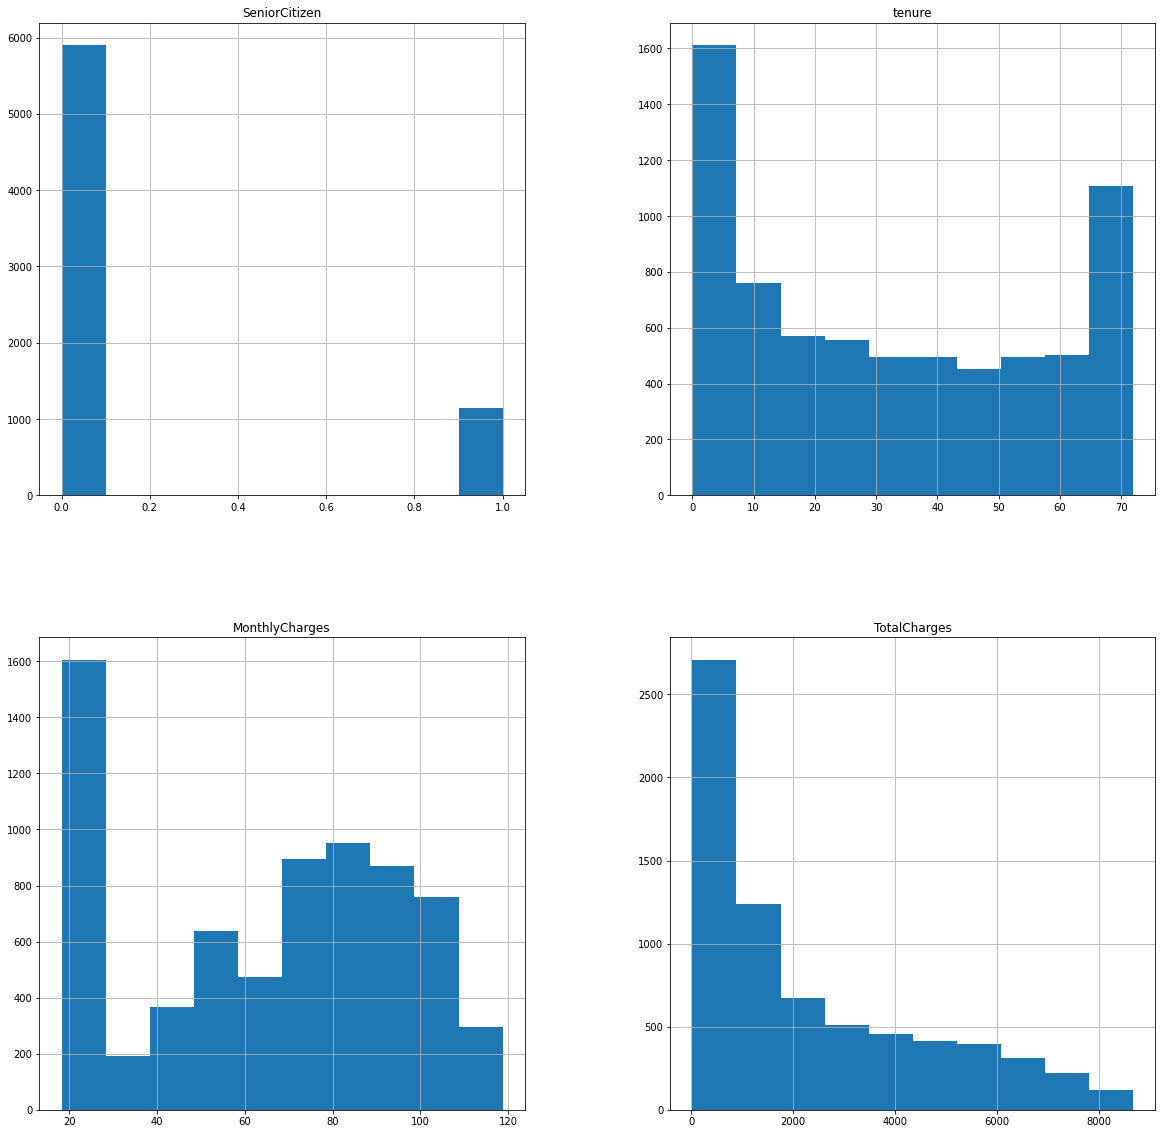

In [24]:
df.hist(figsize=(20,20))

In [25]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Male      3555
Female    3488
Name: gender, dtype: int64


Text(0.5, 1.0, 'Gender')

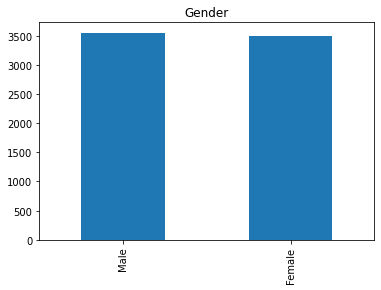

In [26]:
print(df.gender.value_counts())
df['gender'].value_counts().plot(kind='bar').set_title('Gender')

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


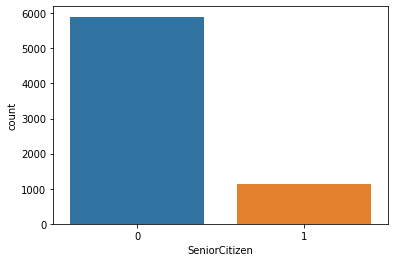

In [27]:
print(df.SeniorCitizen.value_counts())
sns.countplot(x='SeniorCitizen', data=df)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


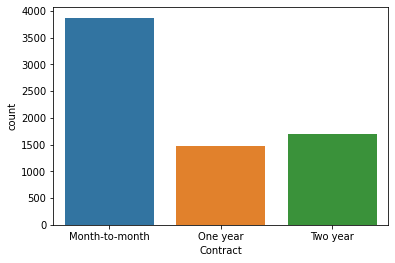

In [28]:
print(df.Contract.value_counts())
sns.countplot(x='Contract', data=df)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


Text(0.5, 1.0, 'PaymentMethod')

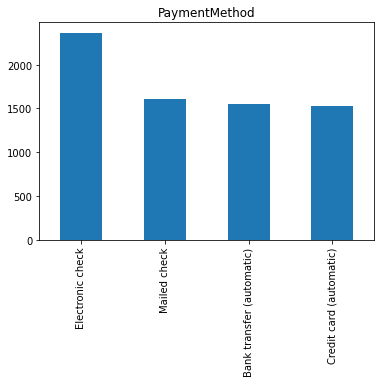

In [29]:
print(df.PaymentMethod.value_counts())
df['PaymentMethod'].value_counts().plot(kind='bar').set_title('PaymentMethod')

Yes    6361
No      682
Name: PhoneService, dtype: int64


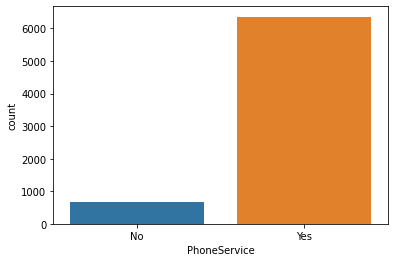

In [30]:
# services= ['PhoneService','MultipleLines','InternetService','OnlineSecurity',  
#            'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

print(df.PhoneService.value_counts())
sns.countplot(x='PhoneService', data=df)

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


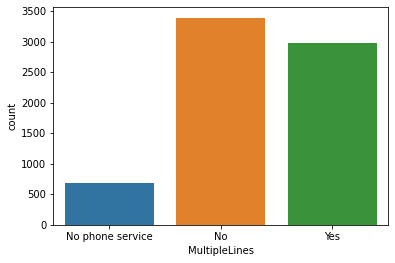

In [31]:
print(df.MultipleLines.value_counts())
sns.countplot(x='MultipleLines', data=df)

No     5174
Yes    1869
Name: Churn, dtype: int64


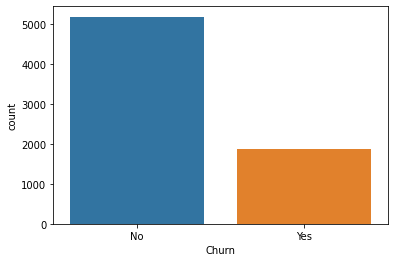

In [32]:
print(df.Churn.value_counts())
sns.countplot(x='Churn', data=df)

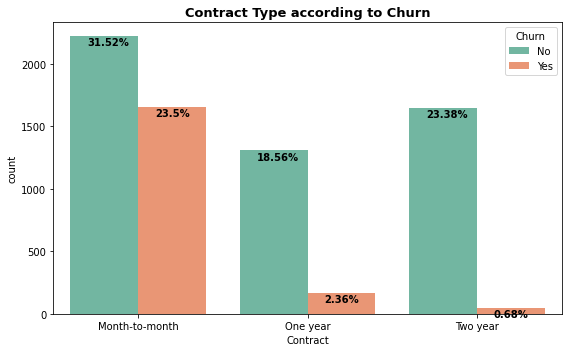

In [33]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
ax.set_title("Contract Type according to Churn", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.10, i.get_height()-75,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black', weight = 'bold')  
plt.tight_layout()

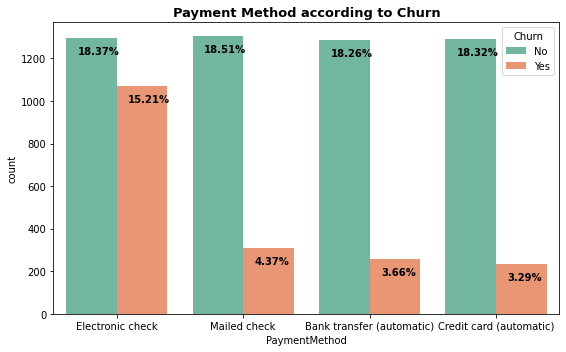

In [34]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set2')
ax.set_title("Payment Method according to Churn", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-75,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black', weight = 'bold')  
plt.tight_layout()

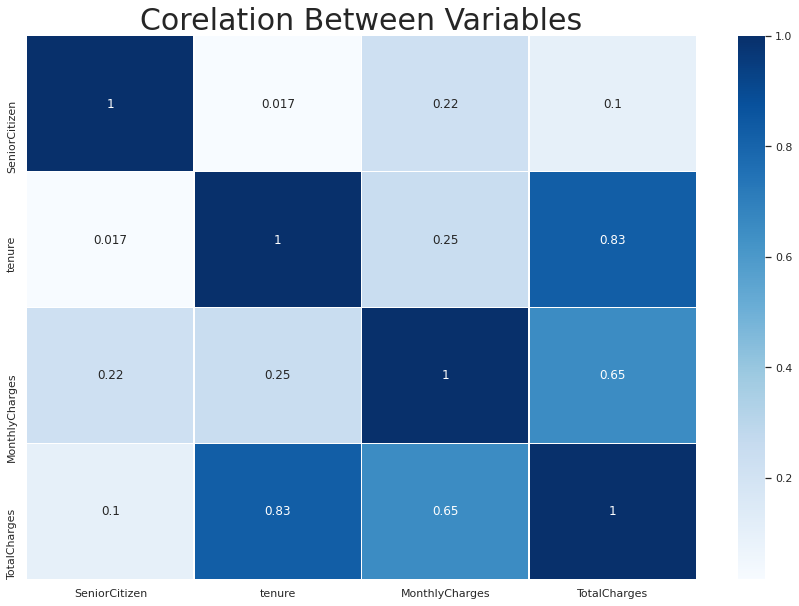

In [35]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

In [36]:
# find and delete any duplicate

duplicated = df.duplicated().sum()
if duplicated:
    print('Duplicates Rows in Dataset are : {}'.format(duplicated))
else:
    print('Dataset contains no Duplicate Values')

Dataset contains no Duplicate Values


# Cleaning up data

In [37]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [38]:
# change the categorical type to categorical variables

df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [39]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype("float")
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [40]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [41]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# Encode categorical variable

In [42]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
# df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [44]:
# df.isnull().sum()

In [45]:
# df = df[df['TotalCharges'].notnull()]
# df = df.reset_index()[df.columns]
# df.isnull().sum()

In [46]:
# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype("float")
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [47]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
df = pd.get_dummies(df, columns=['Contract','Dependents','gender', 'DeviceProtection',
                                 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 
                                 'PaperlessBilling','Partner', 'SeniorCitizen',
                                 'PaymentMethod','PhoneService','TechSupport',
                                 'StreamingTV', 'StreamingMovies'],
                    drop_first=True)

In [49]:
StandardScaler = StandardScaler()
columns_for_ft_scaling= ['tenure', 'MonthlyCharges', 'TotalCharges']
df[columns_for_ft_scaling] = StandardScaler.fit_transform(df[columns_for_ft_scaling])

In [50]:
df['Churn'] = df.Churn.replace({"Yes":0, "No":1})

In [51]:
df.head(3)

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,gender_Male,DeviceProtection_No internet service,DeviceProtection_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,PaperlessBilling_Yes,Partner_Yes,SeniorCitizen_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,-1.277445,-1.160323,-0.994242,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,0.066327,-0.259629,-0.173244,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,3668-QPYBK,-1.236724,-0.362660,-0.959674,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0


In [52]:
y = df['Churn']
X = df.drop(['Churn', 'customerID'], axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [54]:
# LogisticRegression
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train, y_train)
pred= logmodel.predict(X_test)
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred)*100, 2)

# SVC
svcmodel = SVC(kernel='linear', random_state=50, probability=True)
svcmodel.fit(X_train, y_train)
svcpred= svcmodel.predict(X_test)
svcmodel_accuracy = round(metrics.accuracy_score(y_test, pred)*100, 2)

# KNN
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knnmodel.fit(X_train, y_train)
knnpred= knnmodel.predict(X_test)
knnmodel_accuracy = round(metrics.accuracy_score(y_test, pred)*100, 2)

# DT
dtmodel = DecisionTreeClassifier(criterion= "gini", random_state=50)
dtmodel.fit(X_train, y_train)
dtpred= dtmodel.predict(X_test)
dtmodel_accuracy = round(metrics.accuracy_score(y_test, pred)*100, 2)

# RF
rfmodel = RandomForestClassifier(n_estimators=100, random_state=0)
rfmodel.fit(X_train, y_train)
rfpred= rfmodel.predict(X_test)
rfmodel_accuracy = round(metrics.accuracy_score(y_test, pred)*100, 2)

In [55]:
# Model Comparison
Model_Comparison = pd.DataFrame({'Model': ['Logistic Regression', 'SVC', 'KNN','RF','DT'],
                                 'Score':[logmodel_accuracy,
                                          svcmodel_accuracy,
                                          knnmodel_accuracy,
                                          dtmodel_accuracy,
                                          rfmodel_accuracy ]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,79.93,Logistic Regression
1,79.93,SVC
2,79.93,KNN
3,79.93,RF
4,79.93,DT


In [56]:
conf_mat_logmodel = confusion_matrix(y_test, pred)
conf_mat_logmodel

array([[ 320,  237],
       [ 187, 1369]])

In [57]:
# to get probability for logistic regression
df['Probability_Of_Churn'] = logmodel.predict_proba(df[X_test.columns])[:,1]
df[['customerID','Probability_Of_Churn']].head()

,customerID,Probability_Of_Churn
0,7590-VHVEG,0.375506
1,5575-GNVDE,0.952331
2,3668-QPYBK,0.650977
3,7795-CFOCW,0.966956
4,9237-HQITU,0.307921


In [61]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

#Evaluating Model Results:    
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=0)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.49,1.33,74.60,1.75
1,SVC,83.22,1.77,79.86,1.15
6,Random Forest,82.23,1.33,79.43,0.88
4,Gaussian NB,81.53,1.64,65.86,2.11
2,Kernel SVM,79.75,1.73,80.65,0.75
3,KNN,78.68,1.48,76.92,1.29
5,Decision Tree Classifier,65.85,1.34,72.76,1.19


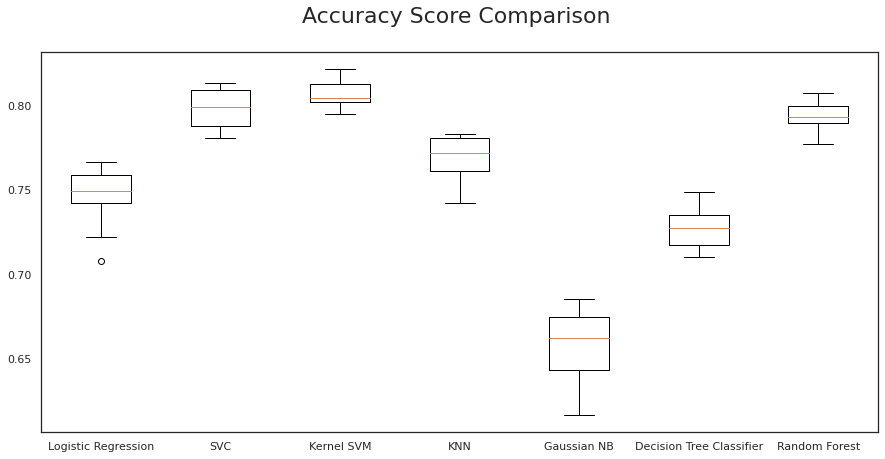

In [62]:
# Visualize Classification Using Accuracy Mean:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

No handles with labels found to put in legend.


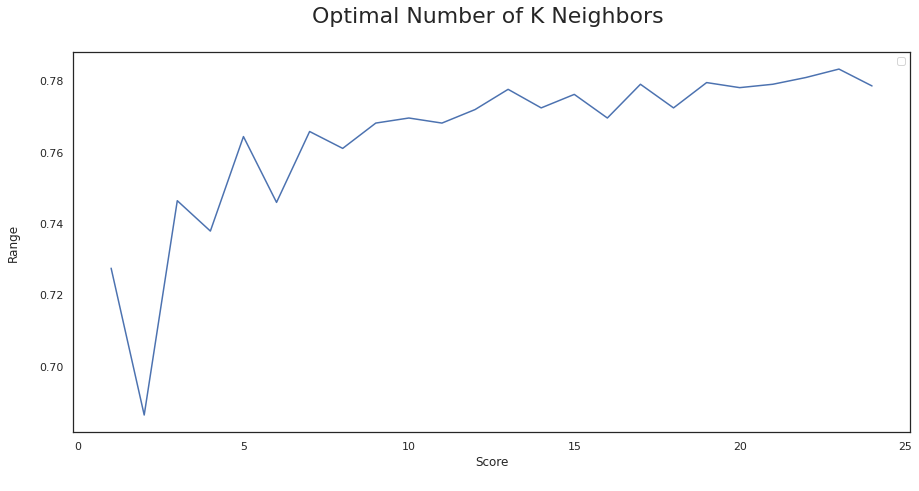

In [63]:
#Identify optimal number of K for KNN Model


score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array)


plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

#optimal number of K neigbors = 22

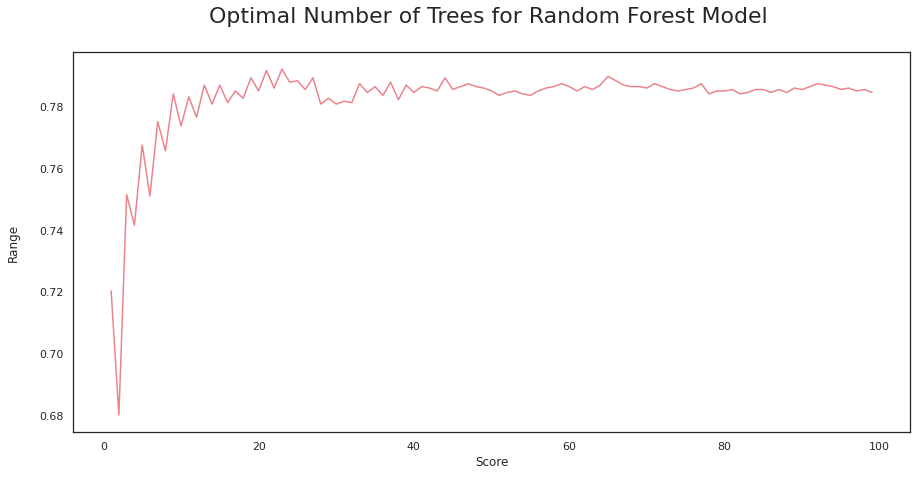

In [64]:
# Identify optimal number of trees for RF

score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')


plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

In [65]:
# Fitting Logistic Regression to Training set, predict and evaluate

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Fitting SVM (SVC class) to the Training set, predict and evaluate

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


# Fitting KNN to the Training set, predict and evaluate

classifier = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred  = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

# Fitting Kernel SVM to the Training set, predict and evaluate

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


# Fitting Naive Byes to the Training set, predict and evaluate
    
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Naive Byes', acc, prec, rec, f1, f2]],
                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

# Fitting Decision Tree to the Training set, predict and evaluate

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

# Fitting Random Forest to the Training set, predict and evaluate

classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

In [66]:
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
4            Naive Byes  0.646947   0.935484  0.559126  0.699920  0.608051
2  K-Nearest Neighbours  0.780880   0.856491  0.843830  0.850113  0.846332
0   Logistic Regression  0.799337   0.852428  0.879820  0.865908  0.874202
1          SVM (Linear)  0.793185   0.845584  0.879820  0.862362  0.872753
3            Kernel SVM  0.796498   0.835119  0.901671  0.867120  0.887525
6         Random Forest  0.783720   0.834043  0.881748  0.857232  0.871775
5         Decision Tree  0.730241   0.824769  0.804627  0.814574  0.808577


In [67]:
# Fit Logistic Regression on the Training dataset, predict and evaluate
    
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

                 Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Logistic Regression  0.799337   0.852428  0.87982  0.865908  0.874202


In [68]:
# k-Fold Cross Validation:

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.81 (+/- 0.02)


Text(0.5, 12.5, 'Predicted label\n')

<Figure size 1080x720 with 0 Axes>

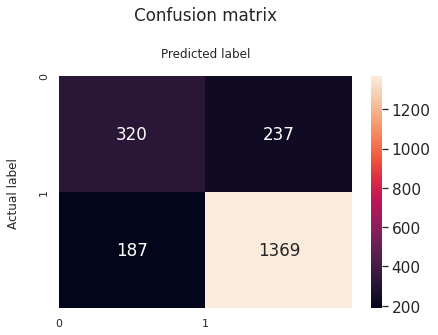

In [70]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (15,10))


fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')#,cmap="YlGnBu" 
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

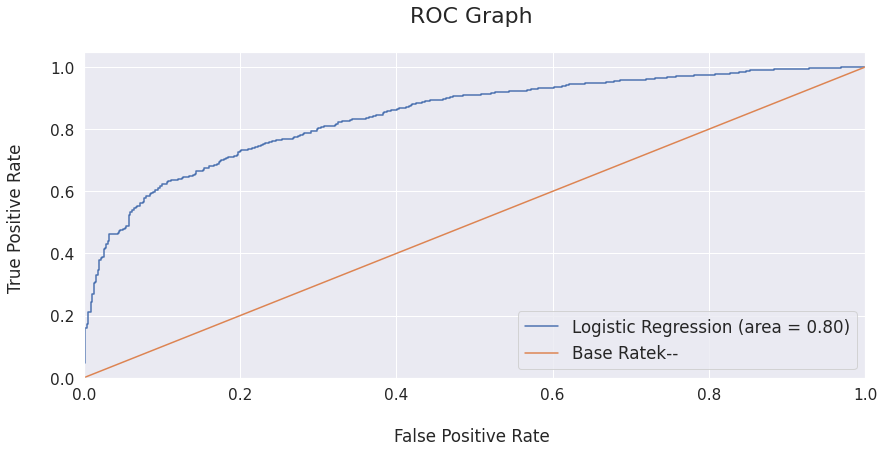

In [71]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

In [75]:
# Feature Importance by using Coefficients

feature_importances = pd.concat([pd.DataFrame(df.drop(columns = 'customerID').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)

,features,coef
0,gender,1.381462
4,tenure,1.326804
3,Dependents,0.674221
23,NaN,0.458815
25,NaN,0.422654
14,Contract,0.407709
8,OnlineSecurity,0.231916
16,PaymentMethod,0.157577
20,NaN,0.150276
5,PhoneService,0.134420
